In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [57]:
os.getcwd()

'D:\\ML Project-Freelancing'

In [3]:
os.chdir("D:\ML Project-Freelancing")

In [4]:
Aut_data = pd.read_csv("Toddler Autism dataset July 2018.csv")
Aut_data


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [5]:
Aut_data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [6]:
Aut_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [7]:
Aut_data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [8]:
Aut_data.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638


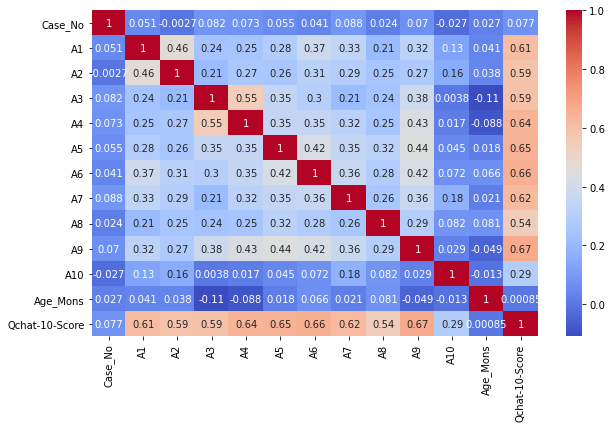

In [9]:
d=Aut_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(d, cmap="coolwarm", annot=True)
plt.show() 

In [10]:
Aut_data.describe(percentiles=[0.01, 0.02, 0.03, 0.04, 0.05, .25, .5, .75, .9, .95, .96, .97, .98, .99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Case_No,1054.0,527.500000,304.407895,1.0,11.53,22.06,32.59,43.12,53.65,264.25,527.5,790.75,948.7,1001.35,1011.88,1022.41,1032.94,1043.47,1054.0
A1,1054.0,0.563567,0.496178,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A2,1054.0,0.448767,0.497604,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A3,1054.0,0.401328,0.490400,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A4,1054.0,0.512334,0.500085,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A5,1054.0,0.524668,0.499628,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A6,1054.0,0.576850,0.494293,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A7,1054.0,0.649905,0.477226,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A8,1054.0,0.459203,0.498569,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0
A9,1054.0,0.489564,0.500128,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.0


In [11]:
Aut_Cat=Aut_data[["Sex","Ethnicity","Jaundice","Family_mem_with_ASD","Who completed the test"]]


In [12]:
Aut_Cat

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,f,middle eastern,yes,no,family member
1,m,White European,yes,no,family member
2,m,middle eastern,yes,no,family member
3,m,Hispanic,no,no,family member
4,f,White European,no,yes,family member
...,...,...,...,...,...
1049,f,White European,no,yes,family member
1050,m,black,yes,no,family member
1051,m,middle eastern,yes,no,family member
1052,m,White European,no,yes,family member


# Label Encoding


In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
Aut_Cat= Aut_Cat.apply(le.fit_transform)
Aut_Cat

,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,8,1,0,4
1,1,5,1,0,4
2,1,8,1,0,4
3,1,0,0,0,4
4,0,5,0,1,4
...,...,...,...,...,...
1049,0,5,0,1,4
1050,1,7,1,0,4
1051,1,8,1,0,4
1052,1,5,0,1,4


In [14]:
Aut_data['Class/ASD Traits '] = Aut_data['Class/ASD Traits '].map({'Yes':1,'No':0})
Aut_data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,0


In [15]:
Aut_data=Aut_data.drop(columns=["Sex","Ethnicity","Jaundice","Family_mem_with_ASD",
                                "Who completed the test","Qchat-10-Score","Case_No"])

In [16]:
Aut_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0
1,1,1,0,0,0,1,1,0,0,0,36,1
2,1,0,0,0,0,0,1,1,0,1,36,1
3,1,1,1,1,1,1,1,1,1,1,24,1
4,1,1,0,1,1,1,1,1,1,1,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0
1050,0,0,1,1,1,0,1,0,1,0,12,1
1051,1,0,1,1,1,1,1,1,1,1,18,1
1052,1,0,0,0,0,0,0,1,0,1,19,0


In [17]:
Aut_new=pd.concat([Aut_data,Aut_Cat],axis=1)

In [18]:
Aut_new

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Class/ASD Traits,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test
0,0,0,0,0,0,0,1,1,0,1,28,0,0,8,1,0,4
1,1,1,0,0,0,1,1,0,0,0,36,1,1,5,1,0,4
2,1,0,0,0,0,0,1,1,0,1,36,1,1,8,1,0,4
3,1,1,1,1,1,1,1,1,1,1,24,1,1,0,0,0,4
4,1,1,0,1,1,1,1,1,1,1,20,1,0,5,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,24,0,0,5,0,1,4
1050,0,0,1,1,1,0,1,0,1,0,12,1,1,7,1,0,4
1051,1,0,1,1,1,1,1,1,1,1,18,1,1,8,1,0,4
1052,1,0,0,0,0,0,0,1,0,1,19,0,1,5,0,1,4


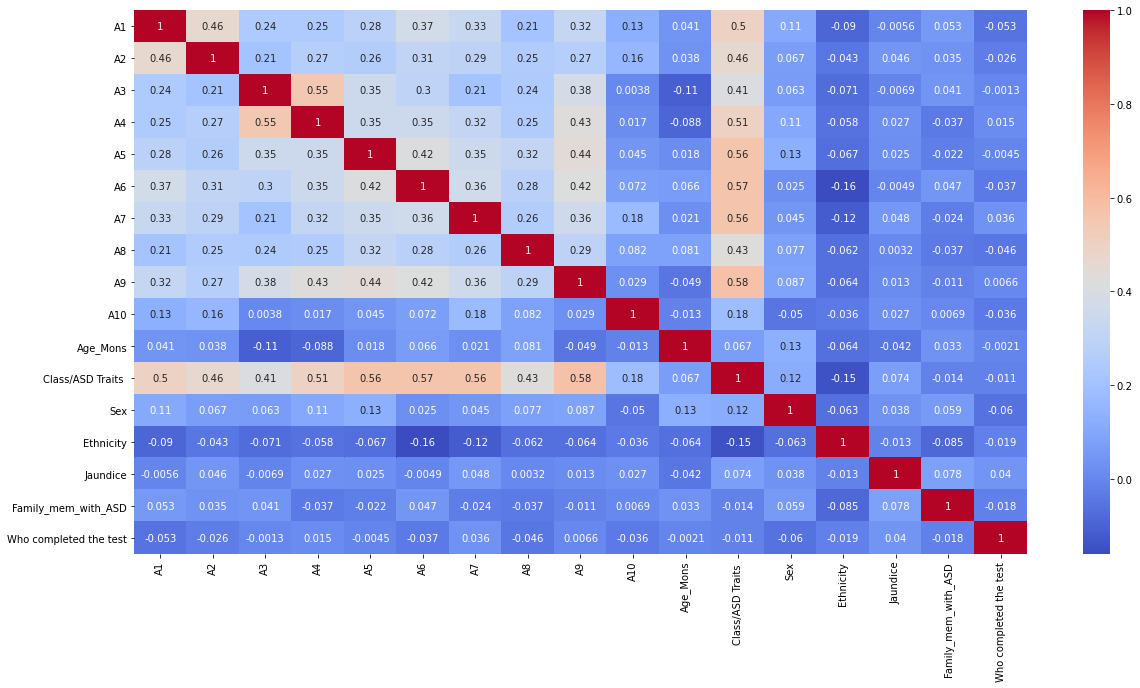

In [19]:
d=Aut_new.corr()
plt.figure(figsize=(20,10))
sns.heatmap(d, cmap="coolwarm", annot=True)
plt.show() 

In [20]:
x = Aut_new.drop(columns=["Class/ASD Traits ","A4","Who completed the test"])
y = Aut_new['Class/ASD Traits ']


# Calulating VIF to make sure our varibale are not co-related anymore

In [21]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
#variation inflation faactor
vif=pd.DataFrame()
vif["vif_value"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"]=x.columns
vif.sort_values(by="vif_value",ascending=False)

,vif_value,features
9,8.214608,Age_Mons
11,5.677725,Ethnicity
5,3.814564,A7
4,3.521046,A6
10,3.361469,Sex
0,3.339118,A1
3,3.126370,A5
7,2.970178,A9
1,2.498345,A2
8,2.449566,A10


# Standarization

In [22]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(x)

In [23]:
x = pd.DataFrame(scaled_df, columns=x.columns)

In [24]:
x

,A1,A2,A3,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.8,1.0,0.0
1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.000000,1.0,0.5,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.000000,1.0,0.8,1.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.500000,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.333333,0.0,0.5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.0,0.5,0.0,1.0
1050,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,1.0,0.7,1.0,0.0
1051,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.250000,1.0,0.8,1.0,0.0
1052,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.291667,1.0,0.5,0.0,1.0


# Splitting Data into Train and Test

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (790, 14)
Shape of x_test:  (264, 14)
Shape of y_train:  (790,)
Shape of y_test:  (264,)


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)


LogisticRegression()

In [27]:
print("Train accuracy:", log.score(x_train,y_train))

print("Test accuracy:", log.score(x_test,y_test))


Train accuracy: 0.9810126582278481
Test accuracy: 0.9545454545454546


In [28]:
l_pred_train = log.predict(x_train)
l_pred_train


array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [29]:
metrics.confusion_matrix(y_train, l_pred_train)

array([[230,   7],
       [  8, 545]], dtype=int64)

In [30]:
print(metrics.classification_report(y_train, l_pred_train)) 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       237
           1       0.99      0.99      0.99       553

    accuracy                           0.98       790
   macro avg       0.98      0.98      0.98       790
weighted avg       0.98      0.98      0.98       790



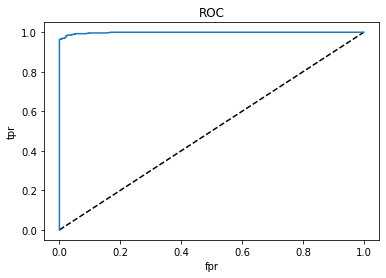

In [31]:
probs=log.predict_proba(x_train)[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_train,probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logisticsregression')
plt.title("ROC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

# Random Forest


In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
clf = RandomForestClassifier(max_depth=8 ,random_state=88)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, random_state=88)

In [34]:
print("Train accuracy:", clf.score(x_train,y_train))

print("Test accuracy:", clf.score(x_test,y_test))


Train accuracy: 0.9974683544303797
Test accuracy: 0.9128787878787878


In [35]:
features = clf.feature_importances_

In [36]:
features= pd.DataFrame(features)
features

,0
0,0.103301
1,0.074120
2,0.057538
3,0.141786
4,0.165865
5,0.119236
6,0.062970
7,0.143083
8,0.018983
9,0.048621


# AdaBoost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [38]:
print("Train accuracy:", abc.score(x_train,y_train))

print("Test accuracy:", abc.score(x_test,y_test))


Train accuracy: 0.9772151898734177
Test accuracy: 0.9659090909090909


In [39]:
a_pred_train = abc.predict(x_train)
a_pred_train

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [40]:
metrics.confusion_matrix(y_train, a_pred_train)

array([[227,  10],
       [  8, 545]], dtype=int64)

In [41]:
print(metrics.classification_report(y_train, a_pred_train)) 

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       237
           1       0.98      0.99      0.98       553

    accuracy                           0.98       790
   macro avg       0.97      0.97      0.97       790
weighted avg       0.98      0.98      0.98       790



# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=11,  p=4)
knn1.fit(x_train, y_train)
print("Train Score :", knn1.score(x_train, y_train))
print("Test Score :", knn1.score(x_test, y_test)) 

Train Score : 0.9632911392405064
Test Score : 0.928030303030303


In [43]:
k_pred_train = knn1.predict(x_train)
k_pred_train

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [44]:
metrics.confusion_matrix(y_train, k_pred_train)

array([[229,   8],
       [ 21, 532]], dtype=int64)

In [45]:
print(metrics.classification_report(y_train, k_pred_train)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       237
           1       0.99      0.96      0.97       553

    accuracy                           0.96       790
   macro avg       0.95      0.96      0.96       790
weighted avg       0.96      0.96      0.96       790



# SVM

In [46]:
from sklearn import svm 
sv2=svm.SVC(kernel='rbf')
sv2.fit(x_train, y_train)
print("Train score :", sv2.score(x_train, y_train))
print("Test score :", sv2.score(x_test, y_test))

Train score : 0.9911392405063291
Test score : 0.9393939393939394


In [47]:
s_pred_train = sv2.predict(x_train)
s_pred_train

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [48]:
metrics.confusion_matrix(y_train, s_pred_train)

array([[235,   2],
       [  5, 548]], dtype=int64)

In [49]:
print(metrics.classification_report(y_train, s_pred_train)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       237
           1       1.00      0.99      0.99       553

    accuracy                           0.99       790
   macro avg       0.99      0.99      0.99       790
weighted avg       0.99      0.99      0.99       790



# Naive Bayes


In [50]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)


GaussianNB()

In [51]:
print("Train Accuracy ",gn.score(x_train,y_train))
print("Test Accuracy ",gn.score(x_test,y_test))

Train Accuracy  0.9582278481012658
Test Accuracy  0.9242424242424242


In [52]:
n_pred_train = gn.predict(x_train)
n_pred_train

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [53]:
metrics.confusion_matrix(y_train, n_pred_train)

array([[213,  24],
       [  9, 544]], dtype=int64)

In [54]:
print(metrics.classification_report(y_train, n_pred_train)) 

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       237
           1       0.96      0.98      0.97       553

    accuracy                           0.96       790
   macro avg       0.96      0.94      0.95       790
weighted avg       0.96      0.96      0.96       790



# Bayesian Logistic Regression

In [55]:
# PyMC3 for Bayesian Inference
pip install pymc3


SyntaxError: invalid syntax (<ipython-input-55-9dd68b7d6979>, line 2)

In [56]:
import pymc3 as pm
from IPython.core.pylabtools import figsize

with pm.Model() as logistic_model:
  
    # Build the model using the formula and specify the data likelihood 
    pm.GLM.from_formula(formula, data = x, family = pm.glm.families.Binomial())
    
    # Using the no-uturn sampler
    sampler = pm.NUTS()
    
    # Sample from the posterior using NUTS
    trace_log = pm.sample(draws=5000, step = sampler, chains=2, tune=1000, random_seed=100)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


NameError: name 'formula' is not defined

In [ ]:
# We are getting best accuracy(F1 Score=0.99) at SVM ,so SVM algorithm suits the best.

In [ ]:
#I tried Bayesian Regression too but it was not working .